## Step 1: **Business Understanding**

**Project Goal**:  
You are tasked with creating a predictive model that determines whether a passenger survived the Titanic disaster based on the given features. You will be using **logistic regression**, a suitable algorithm for binary classification problems.

**Key Tasks**:

-   **Train** a logistic regression model on the Titanic dataset to predict the survival of passengers.
-   **Submit** the predictions for the test dataset to a competition platform (e.g., Kaggle).

**Objective**:  
To accurately predict whether a passenger survived or not using features such as `Pclass`, `Sex`, `Age`, `Fare`, etc.

### Evaluation Metrics:

To evaluate the performance of the logistic regression model, we will use the following metrics:

1.  **Accuracy**:
    
    -   This is the proportion of correctly predicted labels (survived or not survived) out of the total samples.
    -   **Formula**: Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$ where:
        -   TP: True Positives (correctly predicted survivors)
        -   TN: True Negatives (correctly predicted non-survivors)
        -   FP: False Positives (incorrectly predicted survivors)
        -   FN: False Negatives (incorrectly predicted non-survivors)
    
    Accuracy is a basic measure of correctness but can be misleading if the classes are imbalanced.
    
2.  **Confusion Matrix**:
    
    -   The confusion matrix provides a breakdown of actual versus predicted classifications, which allows us to observe **False Positives** and **False Negatives**. This is especially useful for understanding the types of errors the model makes.
        
    -   The matrix looks like this:
        
        |  | Predicted Survived | Predicted Not Survived |
        | --- | --- | --- |
        | **Actual Survived** | True Positive (TP) | False Negative (FN) |
        | **Actual Not Survived** | False Positive (FP) | True Negative (TN) |
        
        -   **True Positive (TP)**: Passengers correctly predicted to survive.
        -   **True Negative (TN)**: Passengers correctly predicted not to survive.
        -   **False Positive (FP)**: Passengers incorrectly predicted to survive (Type I error).
        -   **False Negative (FN)**: Passengers incorrectly predicted not to survive (Type II error).
    
    A **confusion matrix** is a better measure to understand how well the model handles different classes, especially when dealing with imbalanced datasets (as survival on the Titanic may not be balanced between survivors and non-survivors).
    
3.  **Optional Metrics** (can be added later if needed):
    
    -   **Precision**: Measures the accuracy of the positive predictions. Precision is important when False Positives are costly.
    -   **Recall (Sensitivity)**: Measures how well the model captures actual positives. Recall is important when False Negatives are costly.
    -   **F1 Score**: Harmonic mean of precision and recall. It balances both metrics.

### Submission Requirements:

-   The final predictions will be tested against a separate test dataset, and you will submit a file with predicted survival (`0` or `1`) for each passenger. Accuracy will be the main evaluation metric used by the competition platform, but internally, you can rely on the confusion matrix to improve your model's performance.

## Step 2: **Data Understanding**

In this step, we will explore and understand the structure of the dataset, the meaning of each feature, and conduct some **Exploratory Data Analysis (EDA)** to gain initial insights. This will help guide the data preparation and modeling steps.

#### Titanic Dataset Overview

The Titanic dataset consists of two main files:

-   **train.csv**: This file contains labeled data, i.e., each row represents a passenger with the corresponding `Survived` value.
-   **test.csv**: This file contains data similar to the training set, but without the `Survived` column. We will use this data to generate predictions for the competition.

### Feature Explanation

| **Feature Name** | **Description** | **Data Type** | **Notes** |
| --- | --- | --- | --- |
| **PassengerId** | A unique identifier for each passenger | Integer | Irrelevant for prediction, only used for keeping track of passengers in the submission file |
| **Survived** | Survival status (0 = No, 1 = Yes) | Categorical | Target variable we want to predict (binary classification) |
| **Pclass** | Passenger class (1st, 2nd, 3rd) | Ordinal | A proxy for socioeconomic status (SES): 1 = Upper, 2 = Middle, 3 = Lower |
| **Name** | Passenger’s name | String | Could be useful for extracting titles (e.g., Mr., Mrs.) |
| **Sex** | Gender of the passenger (male/female) | Categorical | Important feature, likely correlated with survival |
| **Age** | Age of the passenger in years | Continuous | Contains missing values; important feature as certain age groups may have different survival rates |
| **SibSp** | Number of siblings/spouses aboard | Integer | Possible proxy for family relationships, could affect survival rates |
| **Parch** | Number of parents/children aboard | Integer | Similar to SibSp, indicates family structure on the ship |
| **Ticket** | Ticket number | String | Potentially irrelevant, but can be used for extracting information (e.g., ticket groupings) |
| **Fare** | Fare paid for the ticket | Continuous | Possible proxy for SES, higher fares may correlate with higher survival chances |
| **Cabin** | Cabin number | String | Many missing values; could be useful if grouped into decks |
| **Embarked** | Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) | Categorical | Indicates where the passenger boarded; potentially useful for survival prediction |

### Exploratory Data Analysis (EDA)

Now, let’s go deeper into the dataset through some initial visualizations and statistical summaries. The goal here is to:

-   Understand the distribution of key features.
-   Identify missing values.
-   Detect any potential correlations between features and the target variable (`Survived`).

#### 1\. **Data Overview:**

First, let’s inspect the basic statistics of the dataset and check for any missing values.

In [24]:
# Load the dataset
import pandas as pd

train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

# Get basic info and check for missing values
train_data.info()
train_data.describe()
train_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Initial checks for the dataset will show that **Age**, **Cabin**, and **Embarked** contain missing values.

#### 2\. **Target Distribution:**

Let's first check the distribution of the target variable `Survived` to understand the class balance.

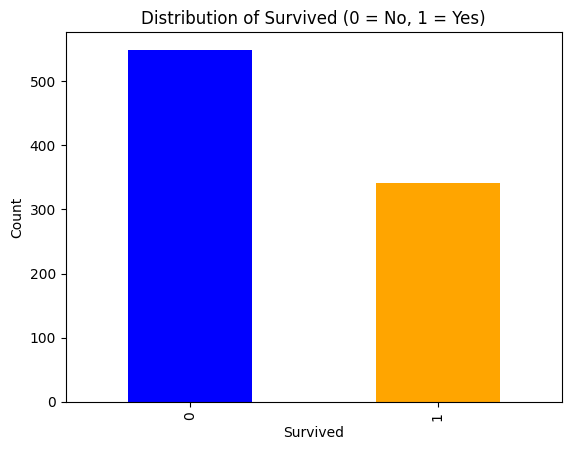

In [25]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
train_data['Survived'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Survived (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


This plot will give us an idea of how balanced the target classes are. If the classes are imbalanced (e.g., more people did not survive), accuracy alone might not be the best metric to evaluate the model.

#### Categorical features

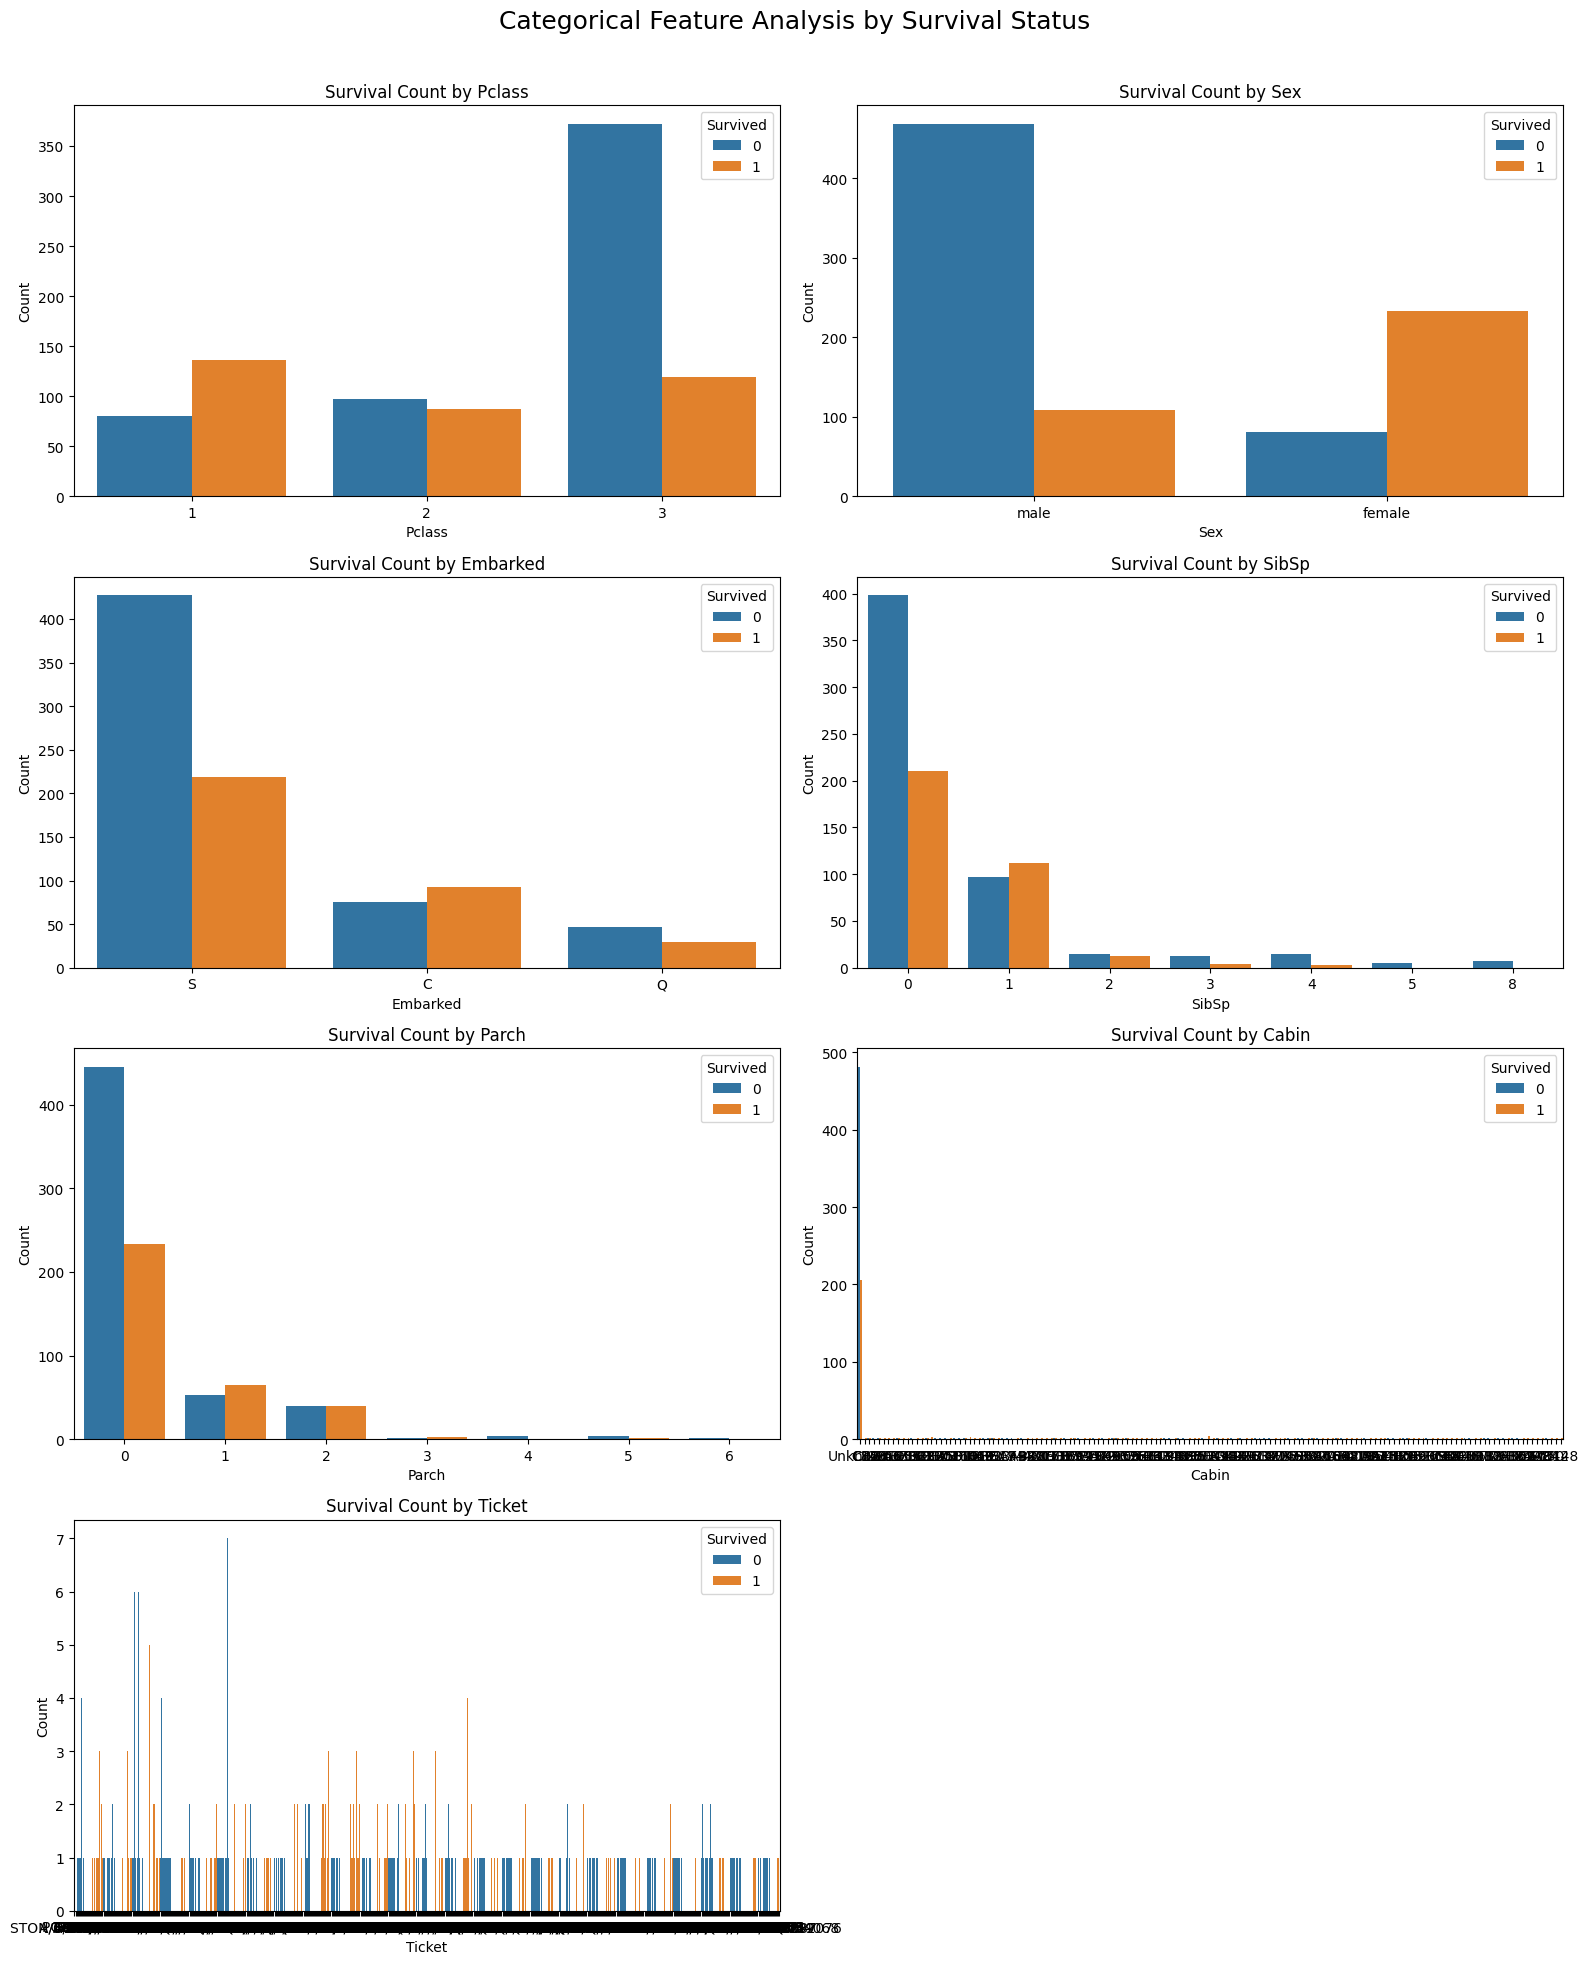

In [26]:
import seaborn as sns

# Handle missing values for visualization
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Cabin', 'Ticket']

# Plotting categorical features grouped by survival
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Categorical Feature Analysis by Survival Status', fontsize=18)

for idx, feature in enumerate(categorical_features):
    ax = axes[idx // 2, idx % 2]
    sns.countplot(x=feature, hue='Survived', data=train_data, ax=ax)
    ax.set_title(f'Survival Count by {feature}')
    ax.set_ylabel('Count')

# Remove any empty subplot
fig.delaxes(axes[3, 1])  # Since there are 7 categorical features

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the title
plt.show()


#### Continuous features

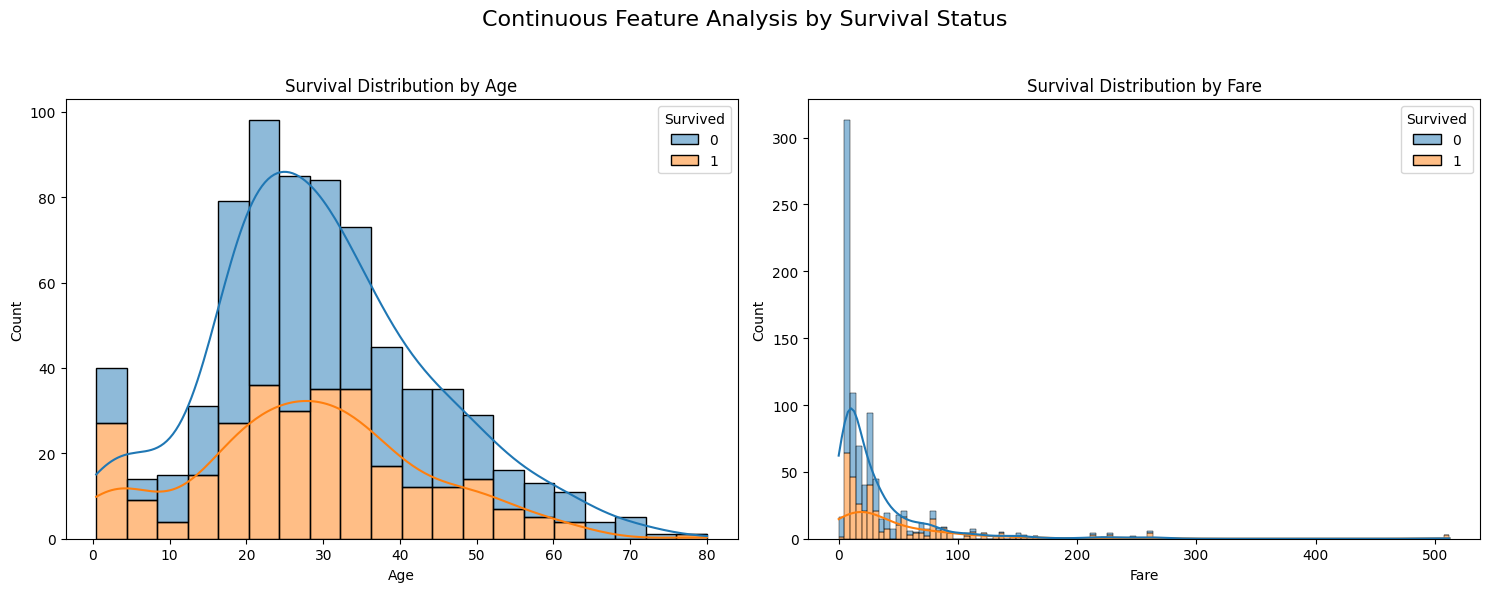

In [27]:
# Plotting continuous features grouped by survival
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Continuous Feature Analysis by Survival Status', fontsize=16)

continuous_features = ['Age', 'Fare']

for idx, feature in enumerate(continuous_features):
    ax = axes[idx]
    sns.histplot(data=train_data, x=feature, hue='Survived', multiple='stack', kde=True, ax=ax)
    ax.set_title(f'Survival Distribution by {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Initial Insights

1.  **Class Imbalance**:  
    The survival rate is imbalanced, with fewer passengers surviving (Survived = 1). This could affect model evaluation, and we may need to rely on additional metrics like the confusion matrix to assess performance.
    
2.  **Key Categorical Features**:
    
    -   **Pclass**: First-class passengers show a significantly higher survival rate.
    -   **Sex**: Females are more likely to survive than males.
    -   **Embarked**: Passengers boarding at Cherbourg (C) appear to have a higher survival rate.
    -   **SibSp** and **Parch**: Having more family members on board does not always guarantee higher survival, but those with smaller family groups might have an advantage.
    -   **Cabin**: While many values are missing, deck information might offer some insight if processed further.
    -   **Ticket**: A more complex feature; further exploration is needed to understand its impact.
3.  **Continuous Features**:
    
    -   **Age**: Younger passengers seem to have a higher survival rate. However, survival spans across all age groups.
    -   **Fare**: Higher fare tends to correlate with higher survival, likely because wealthier passengers had better access to lifeboats or were in better areas of the ship.
4.  **Missing Data**:
    
    -   **Age** has 177 missing values. Given its importance, we will need to handle this by imputing values, possibly using the median or considering `Pclass` to estimate missing values.
    -   **Cabin** has many missing values (687 out of 891). This feature may not be very useful unless we extract deck information from the non-missing values.
    -   **Embarked** has only 2 missing values and can be easily imputed using the mode (most frequent embarkation port).

These insights will guide us in the **Data Preparation** and **Modeling** phases, helping us select important features and handle missing data.

## Step 3: **Data Preparation**

In this step, we'll prepare the data for modeling by handling missing values, encoding categorical features, scaling numerical features, and engineering new features. We’ll ensure that none of the original or engineered features are missed, as per our feature list.

#### Key Steps:

1.  **Handling Missing Values**
2.  **Feature Engineering**
3.  **Encoding Categorical Variables**
4.  **Feature Scaling**
5.  **Final Dataset Ready for Modeling**

___

#### 1\. Handling Missing Values

From the data understanding phase, we identified missing values in several features:

-   **Age**: Contains missing values (177 out of 891).
-   **Cabin**: Contains many missing values (687 out of 891).
-   **Embarked**: Contains 2 missing values.

**Imputation Plan**:

-   **Age**: We'll impute missing `Age` values using the median or use `Pclass` to predict missing ages, as `Pclass` is likely correlated with age.
-   **Cabin**: Given the large number of missing values, we can extract the deck information (first letter of the `Cabin`) and fill missing values with a new category 'Unknown'.
-   **Embarked**: Since only 2 values are missing, we'll impute them with the mode, which is 'S' (Southampton).

___

#### 2\. Feature Engineering

We'll create several new features to enrich the dataset:

-   **Title**: Extract titles from the `Name` feature (e.g., Mr., Mrs., Miss, etc.). These titles can give us insights into social status and possibly survival chances.
-   **FamilySize**: Sum of `SibSp` and `Parch` + 1 (including the passenger). This feature indicates whether the passenger traveled alone or with family.
-   **IsAlone**: Boolean feature indicating whether the passenger traveled alone (1 = alone, 0 = not alone).
-   **Deck**: Extract the first letter from the `Cabin` feature (e.g., 'C', 'B', 'D'). Missing values will be labeled as 'Unknown'.
-   **FarePerPerson**: Create a new feature by dividing `Fare` by `FamilySize` to account for shared tickets.

___

#### 3\. Encoding Categorical Variables

We'll need to encode categorical variables into numerical values for the logistic regression model. This will include:

-   **Sex**: Convert `male` and `female` into binary values (0/1).
-   **Embarked**: Use one-hot encoding for the three embarkation ports (C, Q, S).
-   **Pclass**: Although ordinal, we'll also use one-hot encoding for `Pclass` to give the model flexibility.
-   **Title**: One-hot encode the titles extracted from `Name`.
-   **Deck**: One-hot encode the deck information extracted from `Cabin`.

___

#### 4\. Feature Scaling

Logistic regression models can benefit from scaling continuous features. We will standardize the following numerical features:

-   **Age**
-   **Fare**
-   **FarePerPerson**

Standardization ensures these features have a mean of 0 and standard deviation of 1, which improves model performance.

___

#### 5\. Final Dataset Ready for Modeling

Once all the steps are applied, we'll have a cleaned, feature-engineered dataset with all missing values imputed, categorical variables encoded, and numerical features scaled. This will ensure the dataset is ready for training the logistic regression model.

In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
train_data = pd.read_csv('titanic/train.csv')

def preprocessing_pipeline(data):
    # 1. Handling missing values
    # Impute missing Age with median
    data['Age'].fillna(data['Age'].median(), inplace=True)

    # Impute missing Embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Impute missing Cabin by extracting deck information and filling missing with 'Unknown'
    data['Cabin'] = data['Cabin'].fillna('Unknown')
    data['Deck'] = data['Cabin'].str[0]  # Extract the first letter as deck

    # 2. Feature Engineering
    # Extract Title from Name
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Create FamilySize
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    # Create IsAlone feature
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

    # Create FarePerPerson
    data['FarePerPerson'] = data['Fare'] / data['FamilySize']
 

    # 3. Encoding Categorical Variables
    # One-hot encoding for Pclass, Sex, Embarked, Title, and Deck
    data = pd.get_dummies(data, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Deck'], drop_first=True)

    # Drop irrelevant features: PassengerId, Name, Ticket, Cabin
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


    # 4. Feature Scaling
    scaler = StandardScaler()

    # Features to scale: Age, Fare, FarePerPerson
    data[['Age', 'Fare', 'FarePerPerson']] = scaler.fit_transform(data[['Age', 'Fare', 'FarePerPerson']])


    return data

'''
# 1. Handling missing values
# Impute missing Age with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Impute missing Embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Impute missing Cabin by extracting deck information and filling missing with 'Unknown'
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
train_data['Deck'] = train_data['Cabin'].str[0]  # Extract the first letter as deck

# 2. Feature Engineering
# Extract Title from Name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create FamilySize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Create IsAlone feature
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

# Create FarePerPerson
train_data['FarePerPerson'] = train_data['Fare'] / train_data['FamilySize']

# 3. Encoding Categorical Variables
# One-hot encoding for Pclass, Sex, Embarked, Title, and Deck
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Deck'], drop_first=True)

# Drop irrelevant features: PassengerId, Name, Ticket, Cabin
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 4. Feature Scaling
scaler = StandardScaler()

# Features to scale: Age, Fare, FarePerPerson
train_data[['Age', 'Fare', 'FarePerPerson']] = scaler.fit_transform(train_data[['Age', 'Fare', 'FarePerPerson']])
'''


train_data = preprocessing_pipeline(train_data)

# 5. Final Dataset
#Drop_list = ['Deck_T', 'Title_Major', 'Title_Mme', 'Title_Lady', 'Title_Mlle', 'Title_Countess', 'Title_Sir', 'Title_Don', 'Title_Jonkheer']
#train_data = train_data.drop(Drop_list, axis=1)
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# Check final dataset
X_train.head()


C:\Users\dte10\AppData\Local\Temp\ipykernel_33152\2389238724.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\dte10\AppData\Local\Temp\ipykernel_33152\2389238724.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FarePerPerson,Pclass_2,Pclass_3,Sex_male,...,Title_Rev,Title_Sir,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,-0.565736,1,0,-0.502445,2,0,-0.454798,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,0.663861,1,0,0.786845,2,0,0.438994,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,-0.258337,0,0,-0.488854,1,1,-0.334757,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.433312,1,0,0.420730,2,0,0.185187,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.433312,0,0,-0.486337,1,1,-0.331267,False,True,True,...,False,False,False,False,False,False,False,False,False,True


## Step 4: **Modeling, Feature Selection, and Hyperparameter Tuning**

In this step, we'll build an initial logistic regression model, validate its performance, and perform feature selection using three methods: **RFE**, **SelectKBest**, and **Optuna**. We will also perform **hyperparameter tuning** if needed, and finally, we will retrain the model with the best-selected features.

#### Plan Outline:

1.  **Build Initial Logistic Regression Model** and validate performance.
2.  **Feature Selection** using:
    -   **RFE (Recursive Feature Elimination)**
    -   **SelectKBest**
    -   **Optuna** (automated feature and hyperparameter selection)
3.  **Hyperparameter Tuning** if required.
4.  **Retrain the Model** with selected features.

#### **1\. Build an Initial Model and Validate the Performance**

We will first build an initial logistic regression model using the full set of features (after data preparation) and validate its performance using cross-validation.

##### Code:

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train and y_train are already prepared (from step 3)

# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=5000, random_state=1)

# Train the model
logreg.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred = logreg.predict(X_val)

# Validate performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f"Initial Model Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Initial Model Accuracy: 0.8324022346368715
Confusion Matrix:
[[89 16]
 [14 60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



#### **2\. Perform Feature Selection**

We will now perform feature selection using three different methods: **RFE**, **SelectKBest**, and **Optuna**.

##### Feature Selection Methods:

1.  **Recursive Feature Elimination (RFE)**: RFE recursively removes the least important features based on model coefficients until the desired number of features is reached.
    
2.  **SelectKBest**: SelectKBest selects features based on statistical tests (e.g., chi-square). Note that this method cannot handle negative values, so we will need to adjust the dataset accordingly by applying a transformation like MinMax scaling.
    
3.  **Optuna**: Optuna is an optimization framework that can be used to tune hyperparameters and select features by optimizing model performance.
    

##### Code for Feature Selection:

In [111]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import optuna

# Set the number of features to select (n)
n_features_to_select = 15  # Can be adjusted by the user

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=1)

# --- 1. RFE (Recursive Feature Elimination) ---
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Get RFE-selected feature names
rfe_features = X_train.columns[rfe.support_].tolist()
print(f"RFE Selected Features: {rfe_features}")

# --- 2. SelectKBest (Feature selection based on statistical tests) ---
# MinMax scaling to ensure positive values for SelectKBest
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# SelectKBest with ANOVA F-test
skb = SelectKBest(score_func=f_classif, k=n_features_to_select)
skb.fit(X_train_scaled, y_train)

# Get SelectKBest-selected feature names
skb_features = X_train.columns[skb.get_support()].tolist()
print(f"SelectKBest Selected Features: {skb_features}")

# --- 3. Optuna-based Feature Selection ---
# Define objective function for Optuna to minimize
def objective(trial):
    # Suggest a subset of features
    # set maximum number of features to select as n_features_to_select


    
    selected_features = []
    for i in range(X_train.shape[1]):
        if trial.suggest_categorical(f'feature_{i}', [0, 1]) == 1:
            selected_features.append(i)
        if len(selected_features) > n_features_to_select:
            break   
    if len(selected_features) == 0:
        return 0.0  # Avoid empty feature sets

    # Train logistic regression model on selected features
    model = LogisticRegression(max_iter=5000, random_state=42)
    X_selected = X_train.iloc[:, selected_features]
    scores = cross_val_score(model, X_selected, y_train, cv=5, scoring='accuracy')
    return scores.mean()  # Minimize negative accuracy

# Set up Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Extract selected features from Optuna study
#optuna_features = [X_train.columns[i] for i in range(X_train.shape[1]) if study.best_trial.params[f'feature_{i}'] == 1]
optuna_features = []
for i in range(X_train.shape[1]):
    try:
        if study.best_trial.params[f'feature_{i}'] == 1:
            optuna_features.append(X_train.columns[i])
    except:
        pass

print(f"Optuna Selected Features: {optuna_features}")


[I 2024-10-24 21:31:51,058] A new study created in memory with name: no-name-14b84306-5a4c-4343-bf02-5627807df934
[I 2024-10-24 21:31:51,196] Trial 0 finished with value: 0.8058376749733226 and parameters: {'feature_0': 0, 'feature_1': 1, 'feature_2': 1, 'feature_3': 0, 'feature_4': 1, 'feature_5': 0, 'feature_6': 0, 'feature_7': 1, 'feature_8': 1, 'feature_9': 0, 'feature_10': 1, 'feature_11': 1, 'feature_12': 1, 'feature_13': 1, 'feature_14': 1, 'feature_15': 1, 'feature_16': 1, 'feature_17': 1, 'feature_18': 0, 'feature_19': 0, 'feature_20': 1, 'feature_21': 0, 'feature_22': 1, 'feature_23': 1}. Best is trial 0 with value: 0.8058376749733226.


RFE Selected Features: ['Age', 'FamilySize', 'IsAlone', 'Pclass_3', 'Sex_male', 'Embarked_S', 'Title_Don', 'Title_Master', 'Title_Mr', 'Title_Mrs', 'Title_Rev', 'Deck_D', 'Deck_E', 'Deck_G', 'Deck_U']
SelectKBest Selected Features: ['Fare', 'IsAlone', 'FarePerPerson', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_U']


[I 2024-10-24 21:31:51,283] Trial 1 finished with value: 0.813684012303057 and parameters: {'feature_0': 1, 'feature_1': 0, 'feature_2': 0, 'feature_3': 1, 'feature_4': 1, 'feature_5': 0, 'feature_6': 1, 'feature_7': 0, 'feature_8': 1, 'feature_9': 0, 'feature_10': 0, 'feature_11': 0, 'feature_12': 1, 'feature_13': 1, 'feature_14': 0, 'feature_15': 0, 'feature_16': 0, 'feature_17': 0, 'feature_18': 1, 'feature_19': 1, 'feature_20': 0, 'feature_21': 0, 'feature_22': 1, 'feature_23': 1, 'feature_24': 0, 'feature_25': 0, 'feature_26': 0, 'feature_27': 1, 'feature_28': 1, 'feature_29': 0, 'feature_30': 0, 'feature_31': 0, 'feature_32': 1, 'feature_33': 1, 'feature_34': 1}. Best is trial 1 with value: 0.813684012303057.
[I 2024-10-24 21:31:51,371] Trial 2 finished with value: 0.7923670830456343 and parameters: {'feature_0': 1, 'feature_1': 1, 'feature_2': 0, 'feature_3': 1, 'feature_4': 1, 'feature_5': 1, 'feature_6': 1, 'feature_7': 1, 'feature_8': 0, 'feature_9': 1, 'feature_10': 1, 'feat

Optuna Selected Features: ['Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Title_Jonkheer', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Rev', 'Deck_E']


#### **3\. Select Features for the Next Stage (Union of All Methods)**

We will now combine the features selected by all three methods (`RFE`, `SelectKBest`, and `Optuna`) using a union operation. This ensures we retain features that were selected by at least one of the methods.

##### Code:

In [112]:
# Union of features from all methods
selected_features = list(set(rfe_features) | set(skb_features) | set(optuna_features))

print(f"Union of Selected Features for Next Stage: {selected_features}")

# Prepare the new dataset with selected features
X_train_selected = X_train[selected_features]

# Check the new dataset shape
print(f"New Dataset Shape: {X_train_selected.shape}")


Union of Selected Features for Next Stage: ['Title_Rev', 'Age', 'SibSp', 'Title_Mlle', 'Title_Mme', 'Deck_C', 'Sex_male', 'Deck_E', 'FarePerPerson', 'Fare', 'IsAlone', 'Title_Mr', 'Title_Mrs', 'Deck_U', 'Pclass_3', 'FamilySize', 'Pclass_2', 'Embarked_Q', 'Parch', 'Embarked_S', 'Deck_D', 'Deck_G', 'Title_Master', 'Deck_B', 'Title_Don', 'Title_Jonkheer', 'Title_Miss']
New Dataset Shape: (891, 27)


#### Summary of Step 4:

1.  **Initial Model**: We build and validate the logistic regression model using all available features and assess its performance.
2.  **Feature Selection**:
    -   **RFE**: Selects the most important features by recursively eliminating the least important ones.
    -   **SelectKBest**: Selects the top features based on statistical significance.
    -   **Optuna**: Uses optimization to find the best feature set by minimizing negative accuracy.
3.  **Union of Selected Features**: We combine the selected features from all three methods and prepare the dataset for the next modeling stage.

Let me know if you'd like to proceed with this code or make any adjustments!

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Use the selected features from the previous step
X_train_selected = X_train[selected_features]

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [150, 300, 450],        # Number of trees in the forest
    'max_depth': [5, 10, 20],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best hyperparameters from the grid search
best_rf = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Train the best Random Forest model
best_rf.fit(X_train_selected, y_train)

# Evaluate the best Random Forest model with cross-validation
cv_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")


Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Cross-Validation Scores: [0.84357542 0.82022472 0.86516854 0.79775281 0.85393258]


## Step 5: **Evaluation**

In this step, we will evaluate the performance of the Random Forest model (or any other selected model) on the test dataset and examine various metrics to understand how well the model is performing. This step also involves fine-tuning the model further if necessary.

### Breakdown of Step 5:

1.  **Evaluate the Model on the Test Set**:  
    Use the selected model to make predictions on the test set and calculate the accuracy and other performance metrics.
    
2.  **Generate a Confusion Matrix**:  
    Evaluate the model using a confusion matrix to understand the breakdown of true positives, true negatives, false positives, and false negatives.
    
3.  **Additional Metrics**:  
    Compute additional metrics such as precision, recall, F1 score, and ROC-AUC to assess the overall performance, especially in the case of imbalanced classes.
    
4.  **Fine-tuning** (Optional):  
    Based on the evaluation, decide if any further fine-tuning is necessary. You could re-tune hyperparameters or adjust features.

#### **1\. Evaluate the Model on the Test Set**

Let’s use the trained Random Forest model (or any selected model) to make predictions on the test set and calculate its accuracy.

In [114]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set using the selected model

# Load the test dataset
test_data = pd.read_csv('titanic/test.csv')
y = pd.read_csv('titanic/gender_submission.csv')
test_data = preprocessing_pipeline(test_data)
add_list = ['Title_Col', 'Deck_T', 'Title_Major', 'Title_Lady', 'Title_Mlle', 'Title_Mme', 'Title_Sir', 'Title_Countess', 'Title_Don', 'Title_Jonkheer']
drop_list = ['Title_Dona']
for i in add_list:
    test_data[i] = False
for i in drop_list:
    test_data = test_data.drop(i, axis=1)
test_data_selected = test_data[selected_features]

y_pred = best_rf.predict(test_data_selected)

# Evaluate the model on the test set
accuracy = accuracy_score(y['Survived'], y_pred)
print(f"Test Accuracy: {accuracy}")




Test Accuracy: 0.9258373205741627


C:\Users\dte10\AppData\Local\Temp\ipykernel_33152\2389238724.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\dte10\AppData\Local\Temp\ipykernel_33152\2389238724.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


#### **2\. Generate a Confusion Matrix**

A confusion matrix will give us more detailed insights into the performance of the model by showing true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). This will help us understand where the model might be making mistakes.

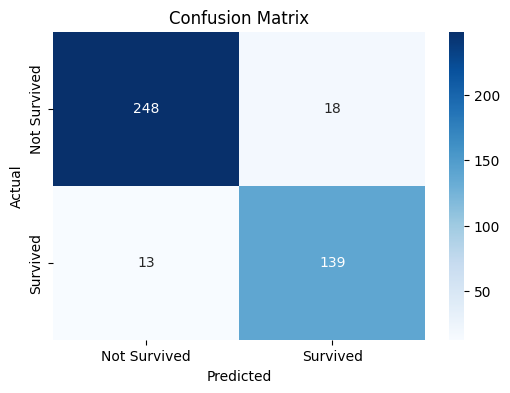

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y['Survived'], y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### **3\. Additional Metrics: Precision, Recall, F1 Score, and ROC-AUC**

While accuracy gives us a good overall measure, additional metrics like **precision**, **recall**, **F1 score**, and **ROC-AUC** are important for evaluating the model, especially when the classes are imbalanced.

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, and F1 score
precision = precision_score(y['Survived'], y_pred)
recall = recall_score(y['Survived'], y_pred)
f1 = f1_score(y['Survived'], y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y['Survived'], y_pred)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Precision: 0.8854
Recall: 0.9145
F1 Score: 0.8997
ROC-AUC Score: 0.9234


#### Summary of Step 5:

1.  **Evaluate the Model**: Calculate accuracy on the test set to assess overall performance.
2.  **Confusion Matrix**: Use a confusion matrix to gain a deeper understanding of how well the model is predicting each class.
3.  **Additional Metrics**: Compute precision, recall, F1 score, and ROC-AUC to provide a comprehensive evaluation of the model.

## Step5-2 : **improve the code by refering winner code in Kaggle**

o fine-tune the model for better accuracy, I reviewed a few high-ranking solutions on Kaggle, such as the approach by **agconti** and **wehrley** on GitHub, both of which performed well in the Titanic competition.

#### Analysis of Champions' Code and How It Differs from Ours:

1.  **Advanced Feature Engineering**:
    
    -   Both repositories focus heavily on feature engineering. For example, **wehrley** combines family-related features like `SibSp` and `Parch` into a **FamilySize** feature, which captures the idea of whether a passenger was traveling alone or with family. This derived feature has shown to improve model performance.
    -   **agconti** extracts **titles** from the `Name` column (e.g., Mr., Mrs., Miss) to group passengers by social rank or marital status. This additional feature helps improve prediction accuracy since it correlates with survival likelihood (e.g., women and children had higher chances of survival).
    
    **Improvement**: In our current setup, we could further refine feature engineering by focusing on such domain-specific features like **FamilySize** and extracting **Title** from `Name`.
    
2.  **Ensemble Methods**:
    
    -   **Random Forest** and **XGBoost** were extensively tested by **wlemusl**, who mentioned that Random Forest outperformed other models, including SVM and decision trees. Additionally, **agconti** also tried **Support Vector Machines (SVM)**, but found ensemble methods like Random Forest to perform better.
    
    **Improvement**: We already incorporated Random Forest, but we could further explore boosting methods like **XGBoost** or **LightGBM**, which are often cited in top-tier solutions for improving accuracy due to their ability to capture complex interactions between features.
    
3.  **Model Validation and Hyperparameter Tuning**:
    
    -   Both repositories extensively used **cross-validation** and **hyperparameter tuning**. For example, **wlemusl** performed thorough tuning of hyperparameters like `n_estimators`, `max_depth`, and `min_samples_split` for Random Forest, along with using different validation strategies.
    -   **agconti** used **k-fold cross-validation** to ensure the model generalizes well to unseen data, reducing overfitting.
    
    **Improvement**: While we have used GridSearchCV for hyperparameter tuning, we could improve the cross-validation strategy by experimenting with different scoring metrics, such as F1-score or ROC-AUC, especially considering potential class imbalances.
    
4.  **Ensemble of Models**:
    
    -   **wlemusl** mentioned using a deep learning model (MLP - Multi-Layer Perceptron) as a comparison to traditional machine learning models. While the MLP didn’t outperform Random Forest, it’s worth noting that combining different models (e.g., through **model stacking** or **voting ensembles**) is a common approach to increase accuracy.
    
    **Improvement**: We could explore **model stacking** by combining predictions from Random Forest, Logistic Regression, and potentially other models like Gradient Boosting or MLP to create a stronger meta-model.
    

### Links to the Code:

-   **agconti**'s approach: [GitHub - agconti Titanic](https://github.com/agconti/kaggle-titanic)
    
    [GitHub](https://github.com/agconti/kaggle-titanic)
    
-   **wehrley**'s approach: [GitHub - wehrley Titanic](https://github.com/wehrley/Kaggle_Titanic)
    
    [GitHub](https://github.com/wehrley/Kaggle_Titanic)
    
-   **wlemusl**'s approach: [GitHub - wlemusl Titanic](https://github.com/wlemusl/titanic-kaggle-ML-competition)
    
    [GitHub](https://github.com/wlemusl/titanic-kaggle-ML-competition)
    

These top-performing solutions highlight areas where we can enhance our model, particularly in feature engineering, model validation, and experimenting with ensemble methods.

## Step 6: **Submitting Predictions on Kaggle**

Now that we’ve fine-tuned the model and are ready for predictions, let’s prepare the final submission file and learn how to upload it to Kaggle.

#### Steps to Output Predictions and Submit:

##### 1\. **Prepare the Submission File**

Kaggle expects the submission file to contain two columns: `PassengerId` and `Survived`. The `PassengerId` should be copied from the test dataset, and the `Survived` column should contain the predicted survival labels (`0` for not survived, `1` for survived).

In [120]:
#reload the data
test_data0 = pd.read_csv('titanic/test.csv')

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data0['PassengerId'],  # Ensure PassengerId is available in your test dataset
    'Survived': y_pred                   # Predictions from the model
})

# Save to a CSV file (without index)
submission.to_csv('titanic_submission.csv', index=False)

# Check the first few rows of the submission file
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


This will create a file named `titanic_submission.csv` in the working directory. Make sure that the column names exactly match `PassengerId` and `Survived`, as Kaggle expects them in this format.



##### 2\. **Submit the File to Kaggle**

Once the `titanic_submission.csv` file is created, follow these steps to submit your file on Kaggle:

1.  **Go to the Titanic competition page on Kaggle**:
    
    -   URL: [Kaggle Titanic Competition](https://www.kaggle.com/c/titanic/overview)
2.  **Navigate to the "Submit Predictions" tab**:
    
    -   Find this tab in the competition page's main menu.
3.  **Upload the CSV file**:
    
    -   Click the "Upload Submission File" button.
    -   Select the `titanic_submission.csv` file you generated.
4.  **Submit**:
    
    -   After uploading, click on **Submit** to send the file for evaluation.
    -   You will receive feedback on your leaderboard position and score based on the test set accuracy.

##### 3\. **Monitor the Leaderboard**

After submission, Kaggle will evaluate your model against the hidden test data and provide your score on the leaderboard. You can iteratively refine your model, resubmit, and aim for a higher score.

___

### Summary:

1.  **Make Predictions**: Use your trained model to predict survival on the test set.
2.  **Prepare the Submission File**: Ensure the file contains `PassengerId` and `Survived` columns.
3.  **Submit to Kaggle**: Upload the file to Kaggle's submission system.
4.  **Monitor Results**: Check your score and compare it with other participants on the leaderboard.